In [1]:
from IPython import get_ipython



In [2]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
get_ipython().run_line_magic('matplotlib', 'inline')


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [4]:
from googletrans import Translator
translator = Translator()


In [5]:
import tweepy
import re


In [6]:
consumer_key = 'NqBQALd2NJ1ENMUzNJNgaNGB9'
consumer_secret = 'LA22dXWezzqiBmMXS701RKsYsGQbYbHyzP9HFFlm2OvFrA4r1B'
access_token = '2754606493-sl2ghWkBY7pGqudkrVTRcnRBOYXDGtig2m4Dtjo'
access_token_secret = 'YCf9YpcESahZx96aKsE8F1rlDMmg3zsWrQslSzAfYMxAb'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [7]:
def list_tweets(tag, count, date_since, prt=False):
    tweets = tweepy.Cursor(api.search,
              q=tag,
              lang="en",
              since=date_since).items(count)
    tweets
    tw = []
    for t in tweets:
        clean=clean_tweets(t.text)
        tw.append(clean)
        if prt:
            print(t.text)
            print()
    return tw


In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt



In [9]:
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst



In [10]:
tag="#Endgame"
count=200
date_since = "2019-1-1"
clean_tag = list_tweets(tag, count, date_since)


In [11]:
# type(clean_tag)
dataset = pd.DataFrame(clean_tag, columns=['headlines'])


In [12]:
all_headlines = ' '.join(dataset['headlines'].str.lower())



In [13]:
stopwords = STOPWORDS
stopwords.add('will')


In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=1600, height=800).generate(all_headlines)


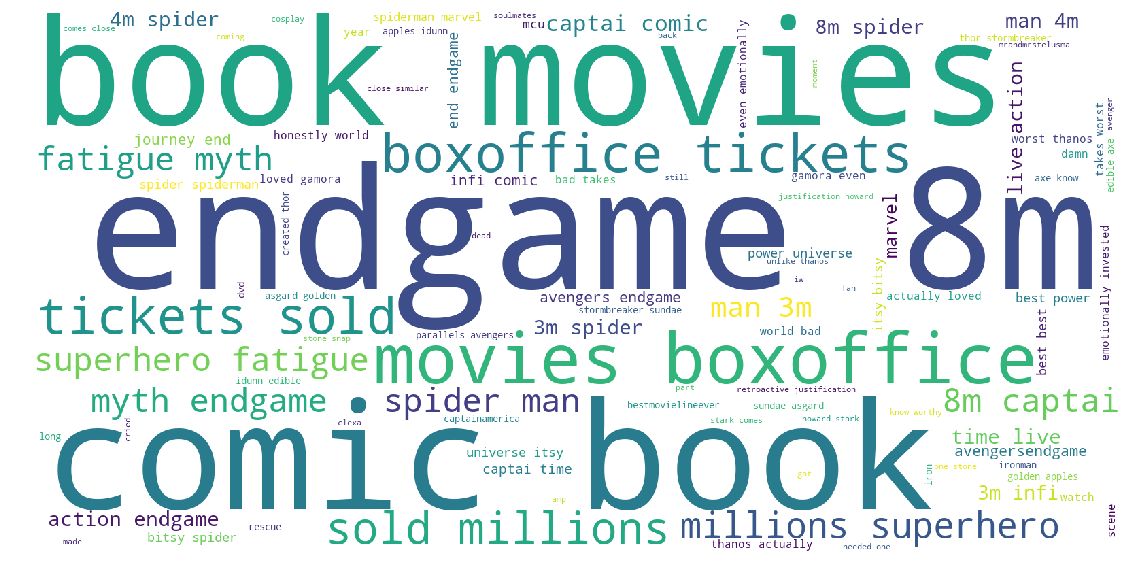

In [15]:
rcParams['figure.figsize'] = 20, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [16]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


<BarContainer object of 10 artists>

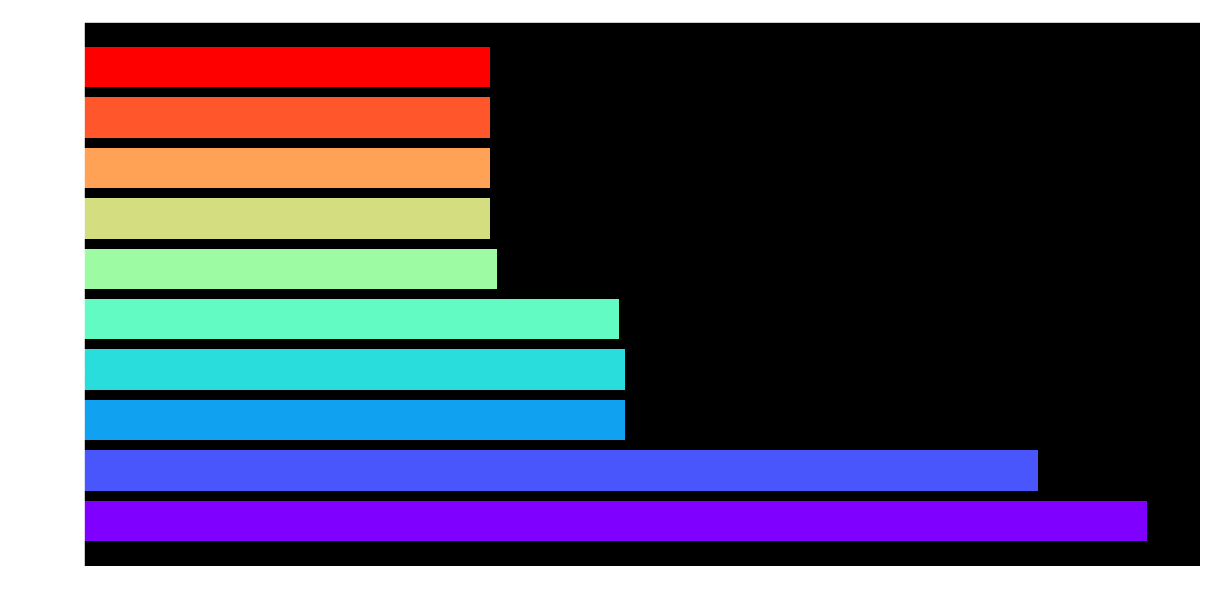

In [17]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)



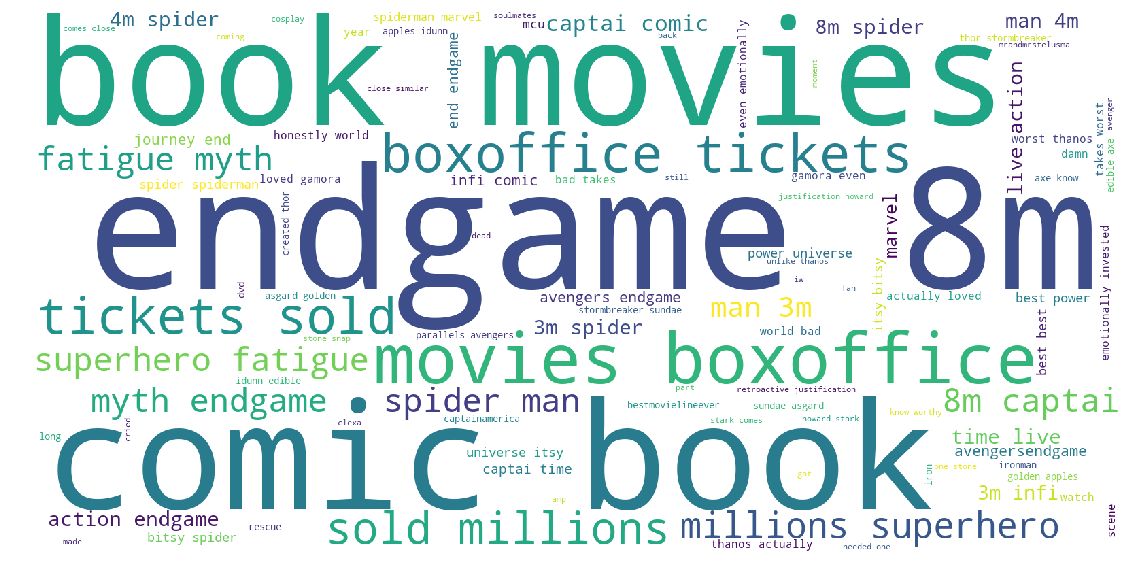

In [18]:
rcParams['figure.figsize'] = 20, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
